<a href="https://colab.research.google.com/github/AlvaroUriel/idal_ia3/blob/main/Hunger_games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

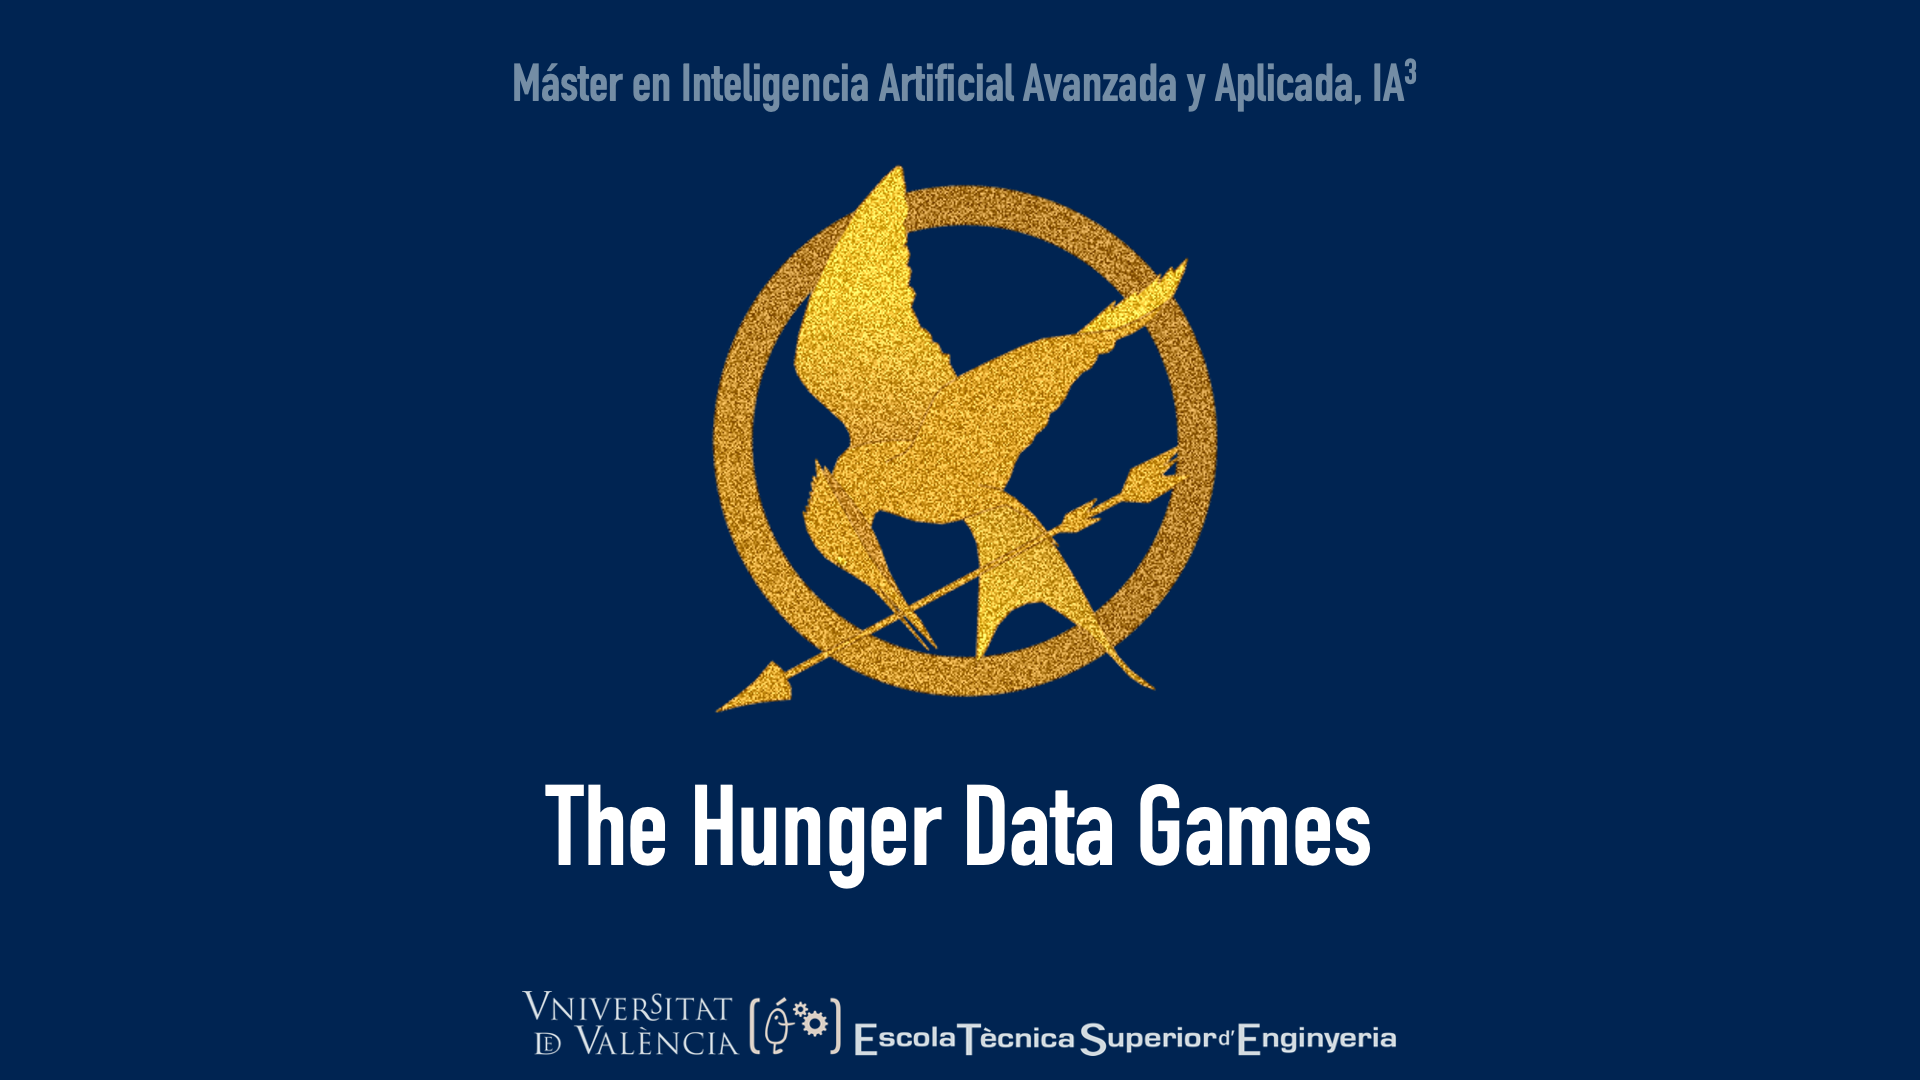

Wellcome to the first hunger data games!!! You have been selected as tributes from your sectors. In this edition you will be facing each other in a classification competition. The dataset you will be facing is this one:



A few recommendations for you to solve the exercise. Remember the different types of algorithm that we have studied and follow a natural path in building the exercise. Commence using a single estimator and try to build a bagging estimator.

For the evaluation metric check this webpage:

https://scikit-learn.org/stable/modules/model_evaluation.html

Specially check those called balanced_accuracy and f1_micro.

Finally the submission of the exercise must be a model file with the name of your team (find one which is cool I will add the coolness of the name to the final grade). 

Check this webpage for saving the model: https://scikit-learn.org/stable/modules/model_persistence.html

One more thing I will evaluate using the np.random.seed(123) use it for training your model.


In case that a preprocessing of data is performed include a class in the notebook which transforms the original input to your desired one.

In [45]:
#Importamos metodos a emplear para el proyecto
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from joblib import dump, load

In [24]:
#Cargamos el dataset
url = "https://raw.githubusercontent.com/CuadraAlconero/IDAL_IA3_CuadraAlconero/main/glass.csv"
dataframe = pd.read_csv(url, header=0)
dataframe.columns = ["refractive_index", "sodium", "magnesium", "aluminum", "silicon", "potassium", "calcium", "barium", "iron", "type_of_glass"]

In [48]:
#Fijamos random.seed para la evaluacion del modelo
np.random.seed(123)

### La variable objetivo a predecir por el modelo es: "type_of_glass".


In [47]:
#Observamos los datos que componen la muestra
dataframe.head(10)

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [49]:
#Comprobamos que los todos los datos son validos
contNull = dataframe.isnull().sum()
contNan  = dataframe.isna().sum()
sum(contNull, contNan)

refractive_index    0
sodium              0
magnesium           0
aluminum            0
silicon             0
potassium           0
calcium             0
barium              0
iron                0
type_of_glass       0
dtype: int64

In [51]:
#Separamos las entradas del modelo, todas menos la ultima que es la variable objetivo
X = dataframe.iloc[:,:-1]
X

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [52]:
#Separamos la variable objetivo
Y = dataframe.iloc[:,-1:]
Y

,type_of_glass
0,1
1,1
2,1
3,1
4,1
...,...
209,7
210,7
211,7
212,7


In [54]:
#Observamos que clases existen
np.unique(Y)

array([1, 2, 3, 5, 6, 7])

In [58]:
#Division muestras en Train Y Test (sin Validacion)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

print(f'Muestras totales  {X.shape[0]}')
print(f'Muestras train    {X_train.shape[0]}')
print(f'Muestras test     {X_test.shape[0]}')


Muestras totales  214
Muestras train    160
Muestras test     54


## Una vez analizados los datos probamos un modelo de Regresión Logística y analizamos sus métricas



In [60]:
#Generacion Modelo: Regresion Logistica
modelLogRegre = LogisticRegression(max_iter=300)
modelLogRegre.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(max_iter=300)

### Metrica f1_micro que calcula la media armónica de la precisión y la sensibilidad

In [61]:
print(f'Resultado modelo modelLogRegre en Train (f1_score): {f1_score(Y_train, modelLogRegre.predict(X_train), average = "micro").round(3)}')
print(f'Resultado modelo modelLogRegre en Test  (f1_score): {f1_score(Y_test, modelLogRegre.predict(X_test), average = "micro").round(3)}')

Resultado modelo modelLogRegre en Train (f1_score): 0.656
Resultado modelo modelLogRegre en Test  (f1_score): 0.593


### Métrica balanced_accuracy_score

In [62]:
print(f'Resultado modelo modelLogRegre en Train (balanced_accuracy_score): {balanced_accuracy_score(Y_train, modelLogRegre.predict(X_train)).round(3)}')
print(f'Resultado modelo modelLogRegre en Test  (balanced_accuracy_score): {balanced_accuracy_score(Y_test, modelLogRegre.predict(X_test),).round(3)}')

Resultado modelo modelLogRegre en Train (balanced_accuracy_score): 0.5
Resultado modelo modelLogRegre en Test  (balanced_accuracy_score): 0.487


### Cálculamos las curvas ROC para cada clase ya que nos permite visualizar la calidad del modelo.


*   Elemento de lista
*   Elemento de lista



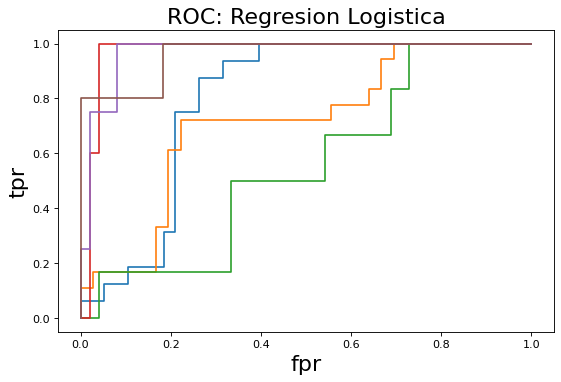

In [86]:
figure(figsize=(8, 5), dpi=80)
for i, tipo in enumerate(np.unique(Y_test)):
  
  type_glass = tipo

  new_probs = []
  for value in Y_test['type_of_glass']:
    if value == type_glass:
      new_probs.append(1.0)
    else:
      new_probs.append(0.0)

  fpr, tpr, thresholds = roc_curve(new_probs, list(modelLogRegre.predict_proba(X_test)[:,i]), drop_intermediate=False)
  df_roc = pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'threshold':thresholds})

  plt.plot(df_roc['fpr'],df_roc['tpr'])

plt.title("ROC: Regresion Logistica",fontsize=20)
plt.xlabel("fpr",fontsize=20)
plt.ylabel("tpr",fontsize=20)
plt.show()

## Tras observar los resultados del modelo de Regresión Logística probamos un modelo de Árbol de Decisión

In [76]:
#Generacion Modelo: Arbol de Decision
modelTree = DecisionTreeClassifier(criterion="entropy", max_depth=6, min_samples_split=10)
modelTree.fit(X_train, Y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=10)

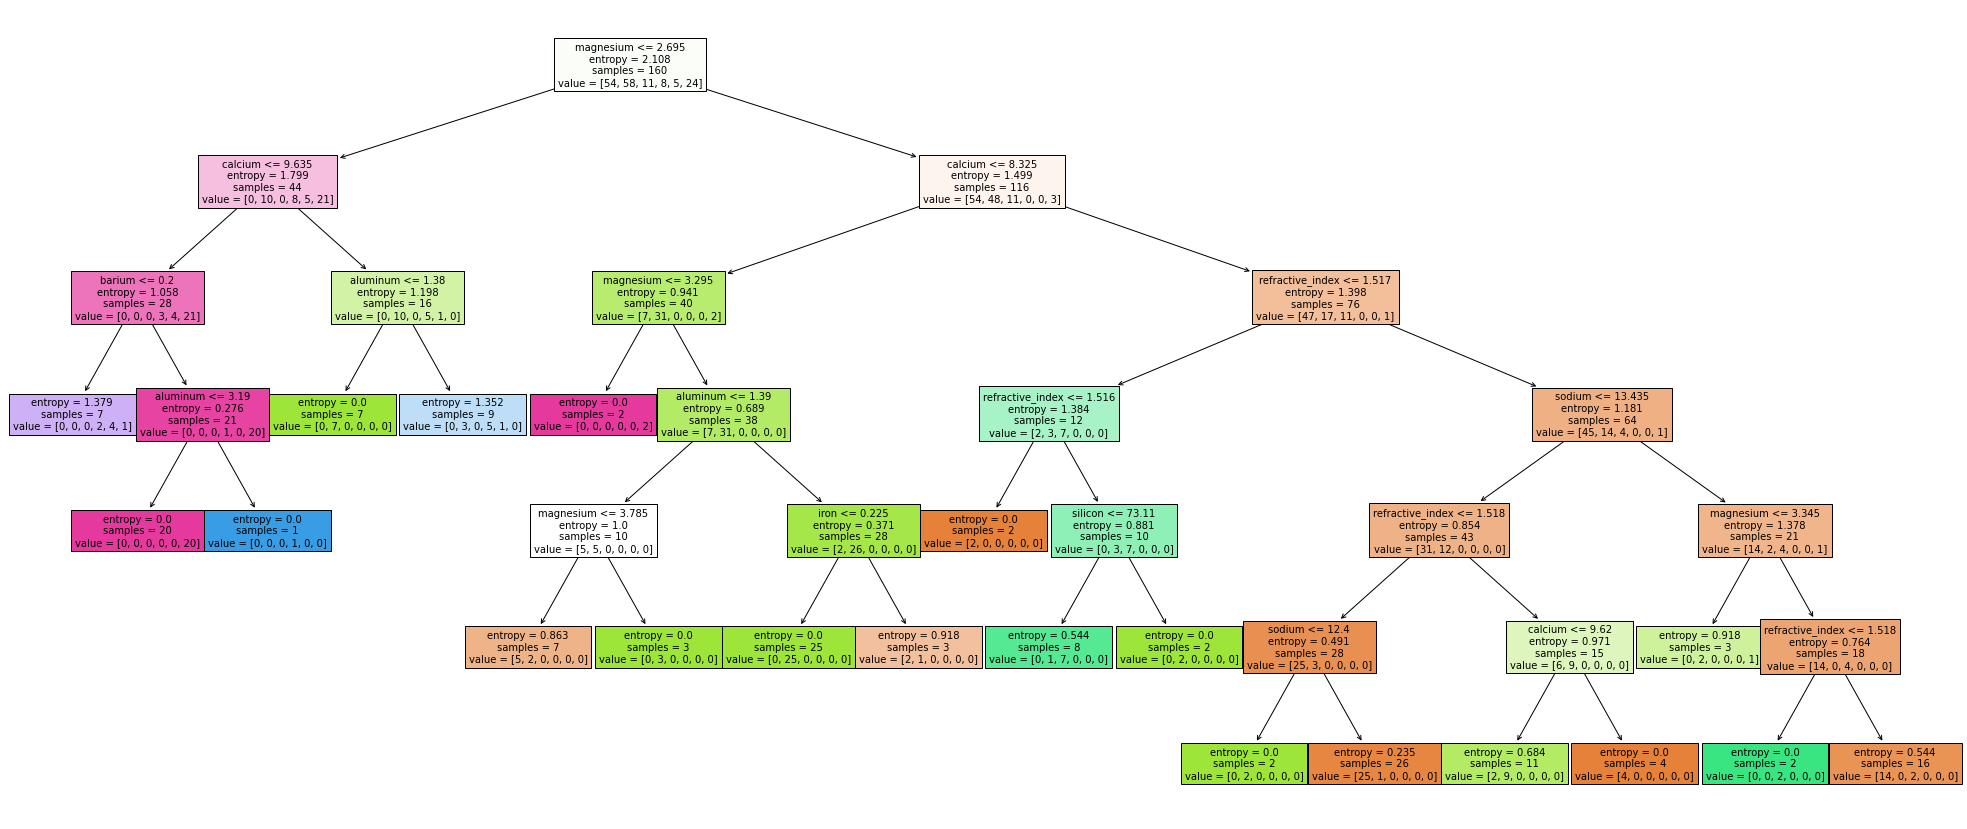

In [77]:
fig = plt.figure(figsize=(35,15))
fig_modelo = plot_tree(modelTree, 
                   feature_names=X.columns,
                   filled=True,
                   fontsize=10)

### Metrica f1_micro que calcula la media armónica de la precisión y la sensibilidad

In [78]:
print(f'Resultado modelo en Train (f1_score): {f1_score(Y_train, modelTree.predict(X_train), average = "micro").round(3)}')
print(f'Resultado modelo en Test  (f1_score): {f1_score(Y_test, modelTree.predict(X_test), average = "micro").round(3)}')

Resultado modelo en Train (f1_score): 0.894
Resultado modelo en Test  (f1_score): 0.667


### Métrica balanced_accuracy_score

In [79]:
print(f'Resultado modelo en Train (balanced_accuracy_score): {balanced_accuracy_score(Y_train, modelTree.predict(X_train)).round(3)}')
print(f'Resultado modelo en Test  (balanced_accuracy_score): {balanced_accuracy_score(Y_test, modelTree.predict(X_test),).round(3)}')

Resultado modelo en Train (balanced_accuracy_score): 0.852
Resultado modelo en Test  (balanced_accuracy_score): 0.634


### Cálculamos las curvas ROC para cada clase ya que nos permite visualizar la calidad del modelo.


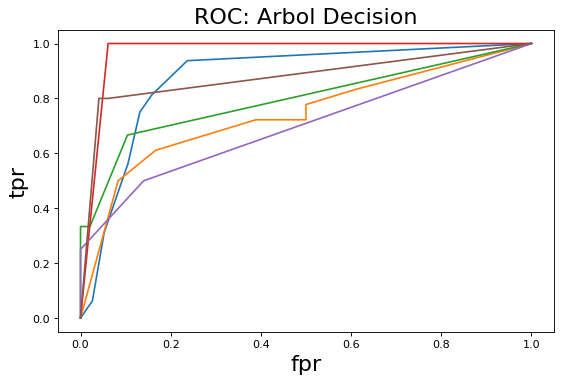

In [87]:
figure(figsize=(8, 5), dpi=80)

for i, tipo in enumerate(np.unique(Y_test)):

  type_glass = tipo

  new_probs = []
  for value in Y_test['type_of_glass']:
    if value == type_glass:
      new_probs.append(1.0)
    else:
      new_probs.append(0.0)

  fpr, tpr, thresholds = roc_curve(new_probs, list(modelTree.predict_proba(X_test)[:,i]), drop_intermediate=False)
  df_roc = pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'threshold':thresholds})

  plt.plot(df_roc['fpr'],df_roc['tpr'])

plt.title("ROC: Arbol Decision",fontsize=20)
plt.xlabel("fpr",fontsize=20)
plt.ylabel("tpr",fontsize=20)
plt.show()

## Tras probar un modelo de Árbol de Decisión vemos que los resultados a los que podemos llegar son notablemente mejores a los del modelo de Regresión Logística


## Por último vamos a observar el comportamos de un modelo de 'Baggin' concretamente usaremos 'RandomForest'

In [81]:
#Generacion Modelo: RandomForest (Bagging example)
modelRanFor = RandomForestClassifier( 100, max_depth=8, min_samples_split=10, criterion="entropy")
modelRanFor.fit(X_train, Y_train)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_split=10)

### Metrica f1_micro que calcula la media armónica de la precisión y la sensibilidad

In [82]:
print(f'Resultado modelo Random Forest en Train (balanced_accuracy_score): {balanced_accuracy_score(Y_train, modelRanFor.predict(X_train)).round(3)}')
print(f'Resultado modelo Random Forest en Test  (balanced_accuracy_score): {balanced_accuracy_score(Y_test, modelRanFor.predict(X_test),).round(3)}')

Resultado modelo Random Forest en Train (balanced_accuracy_score): 0.933
Resultado modelo Random Forest en Test  (balanced_accuracy_score): 0.554



### Métrica balanced_accuracy_score



In [83]:
print(f'Resultado modelo Random Forest en Train (f1_score): {f1_score(Y_train, modelRanFor.predict(X_train), average = "micro").round(3)}')
print(f'Resultado modelo Random Forest en Test  (f1_score): {f1_score(Y_test, modelRanFor.predict(X_test), average = "micro").round(3)}')

Resultado modelo Random Forest en Train (f1_score): 0.956
Resultado modelo Random Forest en Test  (f1_score): 0.685


### Cálculamos las curvas ROC para cada clase ya que nos permite visualizar la calidad del modelo.


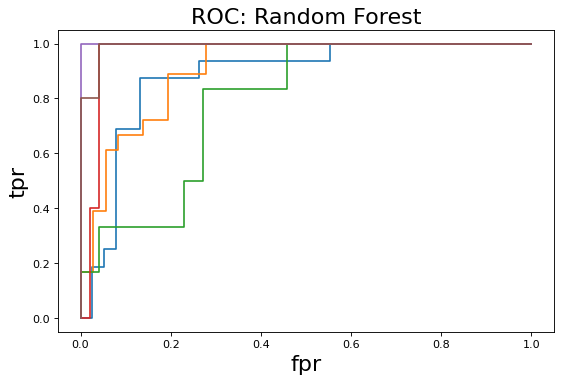

In [88]:
figure(figsize=(8, 5), dpi=80)

for i, tipo in enumerate(np.unique(Y_test)):

  type_glass = tipo

  new_probs = []
  for value in Y_test['type_of_glass']:
    if value == type_glass:
      new_probs.append(1.0)
    else:
      new_probs.append(0.0)

  fpr, tpr, thresholds = roc_curve(new_probs, list(modelRanFor.predict_proba(X_test)[:,i]), drop_intermediate=False)
  df_roc = pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'threshold':thresholds})

  plt.plot(df_roc['fpr'],df_roc['tpr'])

plt.title("ROC: Random Forest",fontsize=20)
plt.xlabel("fpr",fontsize=20)
plt.ylabel("tpr",fontsize=20)
plt.show()

## Tras nuestro estudio inferimos que el modelo que presenta mejores resultados es el de 'Random Forest' tal y como muestran las metricas y la curva ROC. Por ello procedemos a guardarlo.

In [89]:
#Guardado del modelo
dump(modelRanFor, 'miRandomForest.joblib') 

['miRandomForest.joblib']

In [90]:
#Test cargar del modelo
modelRanForReaded = load('miRandomForest.joblib')
print(f'Resultado modelo Random Forest en Train (f1_score): {f1_score(Y_train, modelRanForReaded.predict(X_train), average = "micro").round(3)}')
print(f'Resultado modelo Random Forest en Test  (f1_score): {f1_score(Y_test, modelRanForReaded.predict(X_test), average = "micro").round(3)}')


Resultado modelo Random Forest en Train (f1_score): 0.956
Resultado modelo Random Forest en Test  (f1_score): 0.685
